In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import mean_absolute_error
from jarvis.db.figshare import data


import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
%matplotlib inline

In [3]:
df_pred = pd.read_csv("/scratch/yll6162/CrossPropertyTL/pred/alignn_bert-base-uncased_chemnlp_prop_formation_energy_peratom_pred_otf.csv", index_col = 0)
mean_absolute_error(df_pred['labels'], df_pred['predictions'])

0.034696135853296436

In [9]:
#Datasize
props = ['ehull','slme', 'spillage', 'magmom_outcar','mbj_bandgap', 'Tc_supercon']
llm = "robo"
for prop in props:
    t_file_path = f"/data/yll6162/alignntl_dft_3d/tl_dataset/dataset_bert-base-uncased_{llm}_prop_{prop}.csv"
    df_t = pd.read_csv(t_file_path, index_col = 0)
    print(f"dataset size {prop}: {df_t.shape[0]}")from jarvis.db.figshare import data


dataset size ehull: 51066
dataset size slme: 6721
dataset size spillage: 9428
dataset size magmom_outcar: 50205
dataset size mbj_bandgap: 14613
dataset size Tc_supercon: 882


In [5]:
# MAD
props = ['ehull','slme', 'spillage', 'magmom_outcar','mbj_bandgap', 'Tc_supercon']
# props = ['formation_energy_peratom']

for prop in props:

    t_file_path = f"/data/yll6162/alignntl_dft_3d/tl_dataset/dataset_alignn_bert-base-uncased_chemnlp_prop_{prop}_test.csv"
    df_t = pd.read_csv(t_file_path, index_col = 0)

    tr_file_path = f"/data/yll6162/alignntl_dft_3d/tl_dataset/dataset_alignn_bert-base-uncased_chemnlp_prop_{prop}_train.csv"
    df_tr = pd.read_csv(tr_file_path, index_col = 0)
    
    v_file_path = f"/data/yll6162/alignntl_dft_3d/tl_dataset/dataset_alignn_bert-base-uncased_chemnlp_prop_{prop}_val.csv"
    df_v = pd.read_csv(v_file_path, index_col = 0)
    df_train = pd.concat([df_tr, df_v],axis = 0)
   
    tr_mean = np.mean(df_train[prop].values)
    n = len(df_t[prop].values)
    mad = mean_absolute_error(df_t[prop].values, n * [tr_mean])
    print(f"{prop} MAD: {mad}")
    print(f"dataset size {prop}: {df_tr.shape[0] + df_t.shape[0] + df_v.shape[0]}")



ehull MAD: 0.26184287939060824
dataset size ehull: 74926
slme MAD: 10.772131899280355
dataset size slme: 9764
spillage MAD: 0.5055728693700883
dataset size spillage: 11303
magmom_outcar MAD: 2.1584968862701417
dataset size magmom_outcar: 74214
mbj_bandgap MAD: 1.6565454317662112
dataset size mbj_bandgap: 19556
Tc_supercon MAD: 3.2085387900099276
dataset size Tc_supercon: 1054


In [ ]:


# Create a figure with 4x4 subplots
props = ['ehull','mbj_bandgap', 'slme', 'spillage', 'magmom_outcar','formation_energy_peratom', 'Tc_supercon']
rows = ["gpt2", "bert-base-uncased", "facebook_opt-1.3b"]
columns = ["rf_raw", "rf_chemnlp", "rf_robo", "ft_raw", "ft_chemnlp", "ft_robo"]
# columns = ["rf_raw", "rf_chemnlp", "rf_robo", "ft_raw", "ft_chemnlp"]
# columns = ["rf_raw", "rf_chemnlp", "rf_robo"]
# columns = ["ft_raw", "ft_chemnlp", "ft_robo"]
n_rows = len(rows)
n_cols = len(columns)




# Example data for each subplot
# prop = props[0]

for prop in props:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
    for i in range(n_rows):
        for j in range(n_cols):
            row = rows[i]
            col = columns[j]
            axes[i, j].set_title(f'{prop}: {row}_{col}', fontsize=12)
            filename = "_".join([col.split("_")[0], row, col.split("_")[1], prop]) + '.csv'
            try:
                df = pd.read_csv(os.path.join("pred", filename))
            except:
                pass
            else:
                preds = df["predictions"].values
                labels = df["labels"].values
                axes[i, j].scatter(labels, preds)
                axes[i, j].plot([-100, 100], [-100, 100], '--r', label='y=x', linewidth=3)
                axes[i, j].set_xlim(min(labels), max(labels))
                axes[i, j].set_ylim(min(labels), max(labels))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


/scratch/yll6162/CrossPropertyTL/pred/alignn_prop_mbj_bandgap_pred_otf.csv
   ids_test  labels  predictions
0       NaN   0.959     2.815929
1       NaN   0.000    -0.009874
2       NaN   0.000    -0.010257
3       NaN   0.000    -0.003514
4       NaN   5.360     5.155364
/scratch/yll6162/CrossPropertyTL/pred/alignn_matbert-base-cased_chemnlp_prop_mbj_bandgap_pred_otf.csv
   ids_test  labels  predictions
0       NaN   0.959     2.456999
1       NaN   0.000     0.005969
2       NaN   0.000     0.009239
3       NaN   0.000     0.011317
4       NaN   5.360     5.321721
/scratch/yll6162/CrossPropertyTL/pred/alignn_matbert-base-cased_robo_prop_mbj_bandgap_pred_otf.csv
   ids_test  labels  predictions
0       NaN   0.959     2.429396
1       NaN   0.000    -0.000550
2       NaN   0.000    -0.003908
3       NaN   0.000    -0.002126
4       NaN   5.360     5.211274


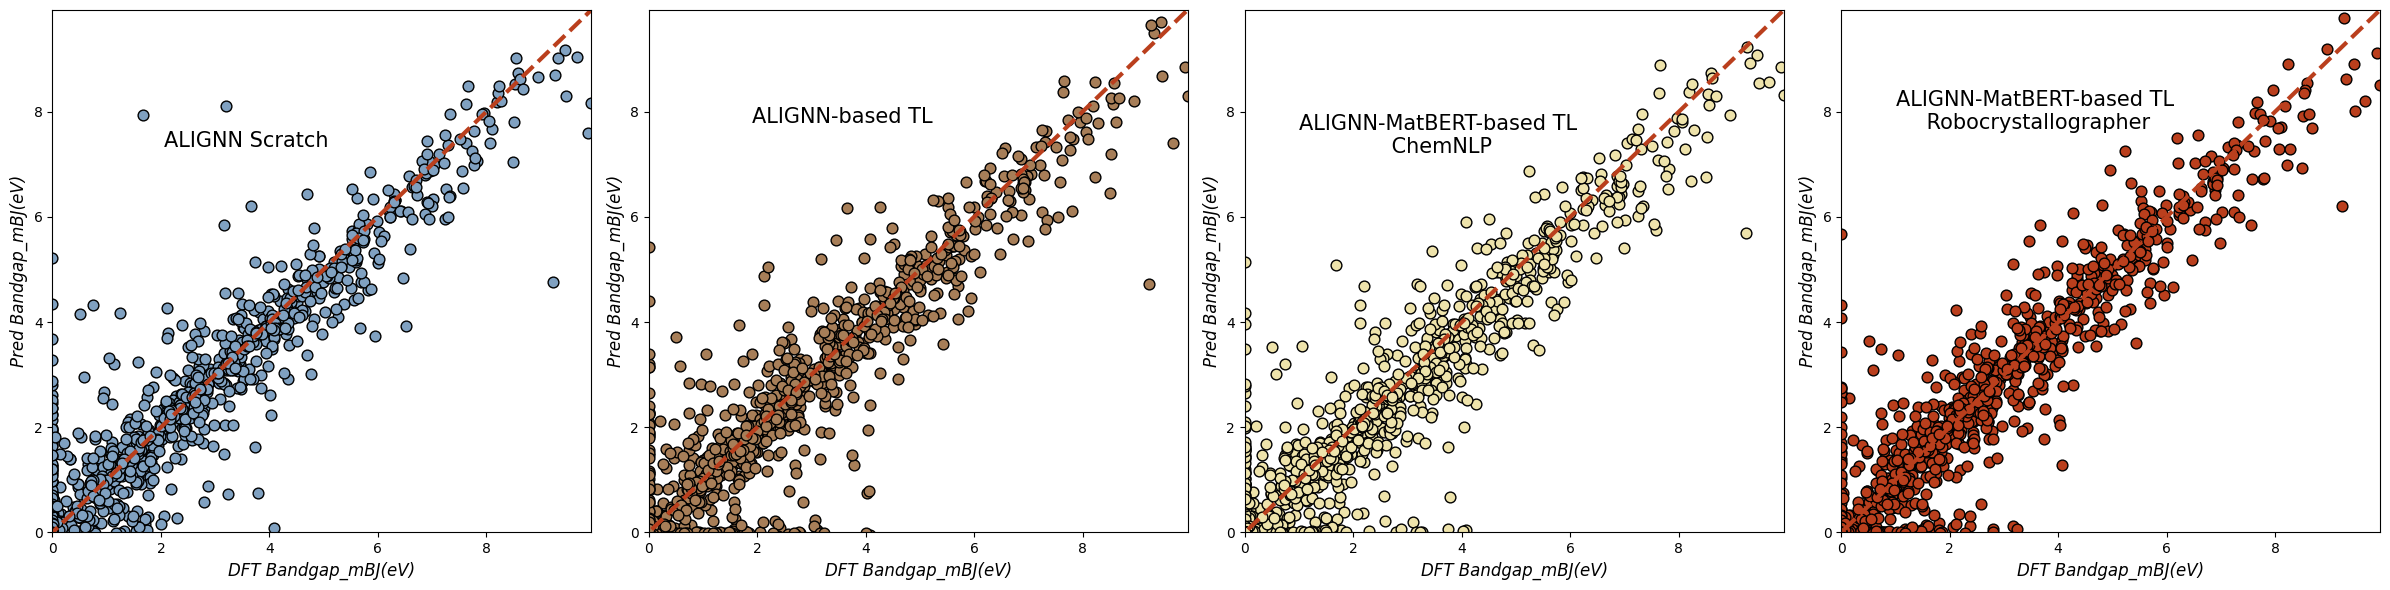

In [3]:
# Create a figure with 4x4 subplots
# props = ['ehull','mbj_bandgap', 'slme', 'spillage', 'magmom_outcar','formation_energy_peratom', 'Tc_supercon']
props = ['mbj_bandgap']
# columns = ["nn_chemnlp", "nn_robo"]
# columns = ["raw_alignn", "alignn", "bert-base-uncased_chemnlp", "bert-base-uncased_robo", 
# "alignn_bert-base-uncased_chemnlp", "alignn_bert-base-uncased_robo"]
columns = ["raw_alignn", "alignn", "alignn_matbert-base-cased_chemnlp", "alignn_matbert-base-cased_robo"]
texts = ["ALIGNN Scratch", "ALIGNN-based TL", "ALIGNN-MatBERT-based TL\n ChemNLP", "ALIGNN-MatBERT-based TL\n Robocrystallographer"]
rows = [""]


# columns = ["rf_raw", "rf_chemnlp", "rf_robo", "ft_raw", "ft_chemnlp"]
# columns = ["rf_raw", "rf_chemnlp", "rf_robo"]
# columns = ["ft_raw", "ft_chemnlp", "ft_robo"]
n_rows = len(rows)
n_cols = len(columns)




# Example data for each subplot
# prop = props[0]

pred_dir = "/scratch/yll6162/CrossPropertyTL/pred/atomgpt_new"
old_pred_dir = "/scratch/yll6162/CrossPropertyTL/pred/"
colors = [   '#80A1C1', '#A77E58','#EEE3AB','#BA3F1D']
# [  '#D9CFC1', '#80A1C1', '#BA3F1D', '#A77E58','#EEE3AB']
for prop in props:

    fig, axes = plt.subplots(n_rows, n_cols , figsize=(6* (n_cols ), 6))
    mae_values = {}
    for i in range(n_rows):
        for j in range(n_cols):
            if n_rows == 1:
                axe = axes[j]
            else:
                axe = axes[i, j]
            row = rows[i]
            col = columns[j]
            # axe.set_title(f'{prop}: {row}_{col}', fontsize=12)
            if col == "raw_alignn":
                filepath = f"/scratch/yll6162/alignn/{prop}/prediction_results_test_set.csv"
            else:

                filename = "_".join([col, "prop", prop, "pred_otf"]) + '.csv'
                # print(os.path.join(pred_dir, filename))
                filepath = os.path.join(old_pred_dir, filename)
                
            try:
        
                df = pd.read_csv(filepath, index_col=0)
            except:
                print("error reading file")
                pass
            
            if col == "raw_alignn":
                preds = df["prediction"].values
                labels = df["target"].values

            else:
                print(filepath)
                print(df.head())
                preds = df["predictions"].values
                labels = df["labels"].values

            x = np.linspace(-100, 100, 100)
            delta = 2

            # Error margin

            # upper_error = x + delta
            # lower_error = x - delta

            # # Fill between the upper and lower error margins
            # axe.fill_between(x, lower_error, upper_error, color='#D9CFC1')

            axe.scatter(labels, preds, color=colors[j], s=60, edgecolors="black", label=col)
            axe.plot([-100, 100], [-100, 100], '--', label='y=x', linewidth=3, color = "#BA3F1D")


            axe.set_ylabel("Pred Bandgap_mBJ(eV)", fontsize=12, fontstyle='italic')
            axe.set_xlabel("DFT Bandgap_mBJ(eV)", fontsize=12, fontstyle='italic')
            axe.set_xlim(min(labels), max(labels))
            axe.set_ylim(min(labels), max(labels))
            # Calculate MAE values and store them
            mae = np.abs(preds - labels)
            mae_values[col] = mae
       # Calculate the midpoint for annotation
            mid_x = (min(labels) + max(labels)) * 0.35
            mid_y = (min(preds) + max(preds)) * 0.8

            # Add annotation in the middle of the plot
            custom_text = texts[j]
            axe.annotate(custom_text, xy=(mid_x, mid_y), xytext=(mid_x, mid_y), fontsize=15,
                         textcoords='offset points', ha='center', va='center')
 # Add the CDF plot
        # cdf_ax = axes[-1, :] if n_rows > 1 else axes[-1]
        # if n_rows == 1:
        #     cdf_ax = axes[n_cols]
        # else:
        #     cdf_ax = axes[i, n_cols]
        # for j, col in enumerate(columns[:]):
        #     if col in mae_values:
        #         mae = mae_values[col]
        #         sorted_mae = np.sort(mae)
        #         cdf = np.arange(1, len(sorted_mae) + 1) / len(sorted_mae)
        #         cdf_ax.plot(sorted_mae, cdf, label=col, color=colors[j])
        #         cdf_ax.set_xlim(-0.2, 4)
        #         # Mark the 50th and 90th percentiles

        #         p50 = np.percentile(mae, 50)
        #         p90 = np.percentile(mae, 100)
        #         print(col)
        #         print(p90)
        #         cdf_ax.axvline(p50, color=colors[j], linestyle='--', linewidth=1)
        #         cdf_ax.axvline(p90, color=colors[j], linestyle='--', linewidth=1)
        #         # cdf_ax.text(p50, 0.5, f'50th %ile ({col})', color=colors[j], ha='right')
        #         # cdf_ax.text(p90, 0.9, f'90th %ile ({col})', color=colors[j], ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("mbj_bandgap_scatter.png", dpi=600, bbox_inches='tight')
# Display the plot
plt.show()
# plt.savefig(f'prediction_{props[0]}.png')

In [ ]:
"/scratch/yll6162/CrossPropertyTL/pred/atomgpt_new/matbert-base-cased_robo_prop_spillage_pred_otf.csv"

### Robo removal

In [36]:
data = {
    'No Removal': {
        'formation_energy_peratom': 0.03386,
        'ehull': 0.03574,
        'mbj_bandgap': 0.25158,
        'slme': 4.56338,
        'spillage': 0.31403,
        'magmom_outcar': 0.42105,
        'Tc_supercon': 2.34070,
    },
    'Summary': {
        'formation_energy_peratom': 0.037168,
        'ehull': 0.040229,
        'mbj_bandgap': 0.259671,
        'slme': 4.761339,
        'spillage': 0.319901,
        'magmom_outcar': 0.430692,
        'Tc_supercon': 2.391199,
    },
    'Site': {
        'formation_energy_peratom': 0.033932,
        'ehull': 0.036322,
        'mbj_bandgap': 0.251430,
        'slme': 4.546650,
        'spillage': 0.314174,
        'magmom_outcar': 0.424398,
        'Tc_supercon': 2.336977,
    },
    'Structure Coordination': {
        'formation_energy_peratom': 0.046841,
        'ehull': 0.061924,
        'mbj_bandgap': 0.323317,
        'slme': 5.246931,
        'spillage': 0.356223,
        'magmom_outcar': 0.572418,
        'Tc_supercon': 2.478207,
    },
    'Bond Length': {
        'formation_energy_peratom': 0.039219,
        'ehull': 0.043238,
        'mbj_bandgap': 0.271388,
        'slme': 4.866273,
        'spillage': 0.324606,
        'magmom_outcar': 0.503708,
        'Tc_supercon': 2.362840,
    },
    'Bond Angle': {
        'formation_energy_peratom': 0.033998,
        'ehull': 0.036396,
        'mbj_bandgap': 0.253203,
        'slme': 4.562128,
        'spillage': 0.314376,
        'magmom_outcar': 0.420230,
        'Tc_supercon': 2.335656,
    }
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
df

# Define the new data as a dictionary
new_data = {
    'No Removal': {
        'Formation Energy(eVatom−1)': 0.00000,
        'Ehull(eVatom−1)': 0.00000,
        'Bandgap_mBJ(eV)': 0.00000,
        'SLME(%)': 0.00000,
        'Spillage': 0.00000,
        'Magout(μB)': 0.00000,
        'Tc_supercon(K)': 0.00000,
    },
    'Summary': {
        'Formation Energy(eVatom−1)': 0.00330,
        'Ehull(eVatom−1)': 0.00449,
        'Bandgap_mBJ(eV)': 0.00809,
        'SLME(%)': 0.19796,
        'Spillage': 0.00588,
        'Magout(μB)': 0.00964,
        'Tc_supercon(K)': 0.05050,
    },
    'Site': {
        'Formation Energy(eVatom−1)': 0.00007,
        'Ehull(eVatom−1)': 0.00059,
        'Bandgap_mBJ(eV)': -0.00015,
        'SLME(%)': -0.01673,
        'Spillage': 0.00015,
        'Magout(μB)': 0.00335,
        'Tc_supercon(K)': -0.00372,
    },
    'Structure\nCoordination': {
        'Formation Energy(eVatom−1)': 0.01298,
        'Ehull(eVatom−1)': 0.02619,
        'Bandgap_mBJ(eV)': 0.07173,
        'SLME(%)': 0.68355,
        'Spillage': 0.04220,
        'Magout(μB)': 0.15137,
        'Tc_supercon(K)': 0.13751,
    },
    'Bond\nLength': {
        'Formation Energy(eVatom−1)': 0.00536,
        'Ehull(eVatom−1)': 0.00750,
        'Bandgap_mBJ(eV)': 0.01981,
        'SLME(%)': 0.30289,
        'Spillage': 0.01058,
        'Magout(μB)': 0.08266,
        'Tc_supercon(K)': 0.02214,
    },
    'Bond\nAngle': {
        'Formation Energy(eVatom−1)': 0.00013,
        'Ehull(eVatom−1)': 0.00066,
        'Bandgap_mBJ(eV)': 0.00162,
        'SLME(%)': -0.00125,
        'Spillage': 0.00035,
        'Magout(μB)': -0.00082,
        'Tc_supercon(K)': -0.00505,
    }
}

# Convert the dictionary to a DataFrame
new_df = pd.DataFrame(new_data)

# Display the DataFrame
new_df


,No Removal,Summary,Site,Structure\nCoordination,Bond\nLength,Bond\nAngle
Formation Energy(eVatom−1),0.0,0.00330,0.00007,0.01298,0.00536,0.00013
Ehull(eVatom−1),0.0,0.00449,0.00059,0.02619,0.00750,0.00066
BgMbj(eV),0.0,0.00809,-0.00015,0.07173,0.01981,0.00162
SLME(%),0.0,0.19796,-0.01673,0.68355,0.30289,-0.00125
Spillage,0.0,0.00588,0.00015,0.04220,0.01058,0.00035
Magout(μB),0.0,0.00964,0.00335,0.15137,0.08266,-0.00082
Tc_supercon(K),0.0,0.05050,-0.00372,0.13751,0.02214,-0.00505


In [39]:

data = {
    'No Removal': {
        'formation_energy_peratom': 0.03386,
        'ehull': 0.03574,
        'mbj_bandgap': 0.25158,
        'slme': 4.56338,
        'spillage': 0.31403,
        'magmom_outcar': 0.42105,
        'Tc_supercon': 2.34070,
    },
    'Summary': {
        'formation_energy_peratom': 0.037168,
        'ehull': 0.040229,
        'mbj_bandgap': 0.259671,
        'slme': 4.761339,
        'spillage': 0.319901,
        'magmom_outcar': 0.430692,
        'Tc_supercon': 2.391199,
    },
    'Site': {
        'formation_energy_peratom': 0.033932,
        'ehull': 0.036322,
        'mbj_bandgap': 0.251430,
        'slme': 4.546650,
        'spillage': 0.314174,
        'magmom_outcar': 0.424398,
        'Tc_supercon': 2.336977,
    },
    'Structure Coordination': {
        'formation_energy_peratom': 0.046841,
        'ehull': 0.061924,
        'mbj_bandgap': 0.323317,
        'slme': 5.246931,
        'spillage': 0.356223,
        'magmom_outcar': 0.572418,
        'Tc_supercon': 2.478207,
    },
    'Bond Length': {
        'formation_energy_peratom': 0.039219,
        'ehull': 0.043238,
        'mbj_bandgap': 0.271388,
        'slme': 4.866273,
        'spillage': 0.324606,
        'magmom_outcar': 0.503708,
        'Tc_supercon': 2.362840,
    },
    'Bond Angle': {
        'formation_energy_peratom': 0.033998,
        'ehull': 0.036396,
        'mbj_bandgap': 0.253203,
        'slme': 4.562128,
        'spillage': 0.314376,
        'magmom_outcar': 0.420230,
        'Tc_supercon': 2.335656,
    }
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
df

# Define the new data as a dictionary
new_data = {
    'No Removal': {
        'Formation Energy(eV/atom)': 0.00000,
        'Ehull(eV/atom)': 0.00000,
        'Bandgap_mBJ(eV)': 0.00000,
        'SLME(%)': 0.00000,
        'Spillage': 0.00000,
        'Magout(μB)': 0.00000,
        'Tc_supercon(K)': 0.00000,
    },
    'Summary': {
        'Formation Energy(eV/atom)': 0.00330,
        'Ehull(eV/atom)': 0.00449,
        'Bandgap_mBJ(eV)': 0.00809,
        'SLME(%)': 0.19796,
        'Spillage': 0.00588,
        'Magout(μB)': 0.00964,
        'Tc_supercon(K)': 0.05050,
    },
    'Site': {
        'Formation Energy(eV/atom)': 0.00007,
        'Ehull(eV/atom)': 0.00059,
        'Bandgap_mBJ(eV)': -0.00015,
        'SLME(%)': -0.01673,
        'Spillage': 0.00015,
        'Magout(μB)': 0.00335,
        'Tc_supercon(K)': -0.00372,
    },
    'Structure\nCoordination': {
        'Formation Energy(eV/atom)': 0.01298,
        'Ehull(eV/atom)': 0.02619,
        'Bandgap_mBJ(eV)': 0.07173,
        'SLME(%)': 0.68355,
        'Spillage': 0.04220,
        'Magout(μB)': 0.15137,
        'Tc_supercon(K)': 0.13751,
    },
    'Bond\nLength': {
        'Formation Energy(eV/atom)': 0.00536,
        'Ehull(eV/atom)': 0.00750,
        'Bandgap_mBJ(eV)': 0.01981,
        'SLME(%)': 0.30289,
        'Spillage': 0.01058,
        'Magout(μB)': 0.08266,
        'Tc_supercon(K)': 0.02214,
    },
    'Bond\nAngle': {
        'Formation Energy(eV/atom)': 0.00013,
        'Ehull(eV/atom)': 0.00066,
        'Bandgap_mBJ(eV)': 0.00162,
        'SLME(%)': -0.00125,
        'Spillage': 0.00035,
        'Magout(μB)': -0.00082,
        'Tc_supercon(K)': -0.00505,
    }
}

# Convert the dictionary to a DataFrame
new_df = pd.DataFrame(new_data)

# Display the DataFrame
new_df



,No Removal,Summary,Site,Structure\nCoordination,Bond\nLength,Bond\nAngle
Formation Energy(eV/atom),0.0,0.00330,0.00007,0.01298,0.00536,0.00013
Ehull(eV/atom),0.0,0.00449,0.00059,0.02619,0.00750,0.00066
BgMbj(eV),0.0,0.00809,-0.00015,0.07173,0.01981,0.00162
SLME(%),0.0,0.19796,-0.01673,0.68355,0.30289,-0.00125
Spillage,0.0,0.00588,0.00015,0.04220,0.01058,0.00035
Magout(μB),0.0,0.00964,0.00335,0.15137,0.08266,-0.00082
Tc_supercon(K),0.0,0.05050,-0.00372,0.13751,0.02214,-0.00505


In [38]:
import pandas as pd

# Define the data
data = {
    "Property": ["Formation Energy(eV/atom/)", "Ehull(eV/atom)	", "Bandgap_mBJ(eV)", "SLME(%)", "Spillage", "Magout(μB)", "Tc_supercon(K)"],
    "No Removal": [0.03450, 0.03589, 0.27202, 4.65788, 0.32147, 0.39320, 2.07876],
    "Chemical": [0.039039, 0.039799, 0.269331, 4.717387, 0.324116, 0.44984, 2.088731],
    "Structure": [0.062664, 0.07701, 0.301744, 5.249118, 0.339983, 0.551427, 2.248162],
    "Bond Length": [0.034499, 0.036365, 0.269725, 4.674973, 0.321157, 0.392273, 2.086468]
}

# Create the DataFrame
df = pd.DataFrame(data)
df.set_index(keys="Property", inplace=True)

# Display the DataFrame
df


# Define the data
data = {
    "Property": ["Formation Energy(eV/atom)", "Ehull(eV/atom)", "Bandgap_mBJ(eV)", "SLME(%)", "Spillage", "Magout(μB)", "Tc_supercon(K)"],
    "No Removal":[0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000],
    "Chemical": [0.00454, 0.00391, -0.00269, 0.05951, 0.00264, 0.05664, 0.00997],
    "Structure": [0.02816, 0.04112, 0.02972, 0.59124, 0.01851, 0.15822, 0.16940],
    "Bond\nLength": [0.00000, 0.00048, -0.00230, 0.01710, -0.00032, -0.00093, 0.00771]
}

# Create the DataFrame
new_df = pd.DataFrame(data)
new_df.set_index(keys="Property", inplace=True)
# Display the DataFrame
new_df

,No Removal,Chemical,Structure,Bond\nLength
Property,,,,
Formation Energy(eV/atom),0.0,0.00454,0.02816,0.00000
Ehull(eV/atom),0.0,0.00391,0.04112,0.00048
BgMbj(eV),0.0,-0.00269,0.02972,-0.00230
SLME(%),0.0,0.05951,0.59124,0.01710
Spillage,0.0,0.00264,0.01851,-0.00032
Magout(μB),0.0,0.05664,0.15822,-0.00093
Tc_supercon(K),0.0,0.00997,0.16940,0.00771


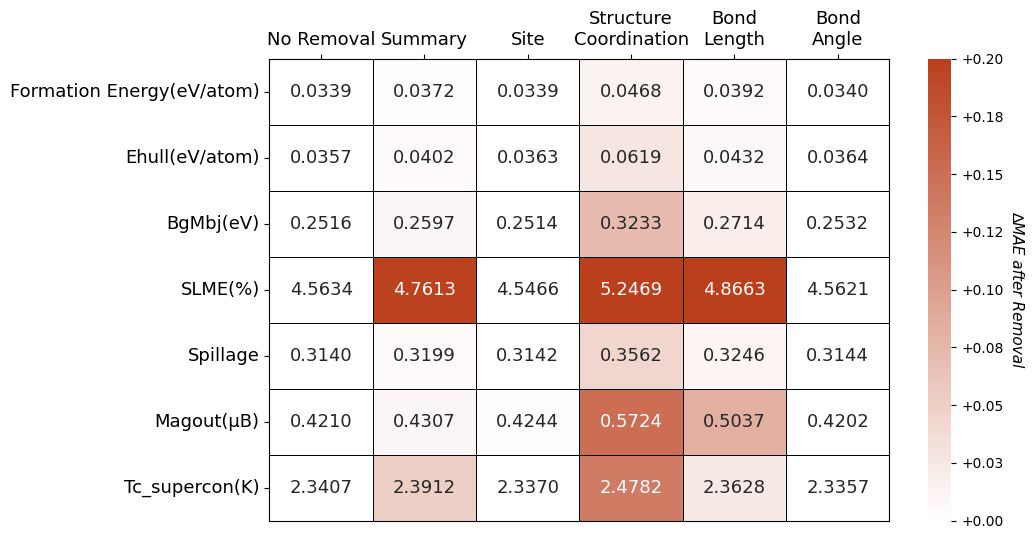

In [40]:


# Define your RGB hex values
# hex_colors = ["#C25759", "#E69191", "#EDB8B0", "#F5DFDB", "#CCE4EF", "#AECFD4", "#92B5CA", "#599CB4"]
# hex_colors = [ "#C25759", "#E69191", "#EDB8B0", "#F5DFDB"]
hex_colors = [ "#FFFFFF", "#BA3F1D"]
# hex_colors.reverse()
# Convert hex colors to normalized RGB tuples
rgb_colors = [tuple(int(h[i:i+2], 16) / 255 for i in (1, 3, 5)) for h in hex_colors]

# Create a continuous colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", rgb_colors, N=100)

# Create a colormap
# custom_cmap = ListedColormap(rgb_colors)

# Generate some data
new_df
def format_func(value, tick_number):
    return f"{'+' if value >= 0 else '-'}{abs(value):.2f}"
# Plot heatmap using the custom colormap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(new_df, cmap=custom_cmap, vmin=-0.0, vmax=0.2, annot=df.values, fmt=".4f", annot_kws={"size": 13},
    linecolor='black', linewidths=0.5)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))
cbar.ax.set_ylabel('∆MAE after Removal', rotation=-90, va="bottom", fontsize=11, fontstyle='italic')
ax.xaxis.tick_top()
# font = FontProperties()
# font.set_family('serif')
# font.set_name('Arial')
# font.set_size(12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.gca().spines['bottom'].set_visible(True)  # Show top spine
plt.gca().spines['right'].set_visible(True)  # Show right spine
plt.gca().spines['top'].set_visible(True)  # Show top spine
plt.gca().spines['left'].set_visible(True)  # Show right spine
plt.savefig("robo_heatmap.png", dpi=600, bbox_inches='tight')

plt.show()

In [22]:
import pandas as pd

# Define the new data as a dictionary
new_data = {
    'Summary': {
        'Formation\nEnergy(eVatom−1)': '9.76%',
        'Ehull(eVatom−1)': '12.58%',
        'Bandgap_mBJ(eV)': '3.21%',
        'SLME(%)': '4.34%',
        'Spillage': '1.87%',
        'Magout(μB)': '2.29%',
        'Tc_supercon(K)': '2.16%',
    },
    'Site': {
        'Formation\nEnergy(eVatom−1)': '0.20%',
        'Ehull(eVatom−1)': '1.64%',
        'Bandgap_mBJ(eV)': '-0.06%',
        'SLME(%)': '-0.37%',
        'Spillage': '0.05%',
        'Magout(μB)': '0.80%',
        'Tc_supercon(K)': '-0.16%',
    },
    'Structure\nCoordination': {
        'Formation\nEnergy(eVatom−1)': '38.32%',
        'Ehull(eVatom−1)': '73.29%',
        'Bandgap_mBJ(eV)': '28.51%',
        'SLME(%)': '14.98%',
        'Spillage': '13.44%',
        'Magout(μB)': '35.95%',
        'Tc_supercon(K)': '5.87%',
    },
    'Bond\nLength': {
        'Formation\nEnergy(eVatom−1)': '15.82%',
        'Ehull(eVatom−1)': '21.00%',
        'Bandgap_mBJ(eV)': '7.87%',
        'SLME(%)': '6.64%',
        'Spillage': '3.37%',
        'Magout(μB)': '19.63%',
        'Tc_supercon(K)': '0.95%',
    },
    'Bond Angle': {
        'Formation\nEnergy(eVatom−1)': '0.40%',
        'Ehull(eVatom−1)': '1.85%',
        'Bandgap_mBJ(eV)': '0.64%',
        'SLME(%)': '-0.03%',
        'Spillage': '0.11%',
        'Magout(μB)': '-0.19%',
        'Tc_supercon(K)': '-0.22%',
    }
}

# Convert the dictionary to a DataFrame
df_error = pd.DataFrame(new_data)

# Function to convert percentage string to float
def percent_to_float(s):
    return float(str(s).strip('%')) / 100

# Apply the function to convert the percentage columns
for column in df_error.columns:
    df_error[column] = df_error[column].apply(percent_to_float)

# Display the DataFrame
df_error


,Summary,Site,Structure\nCoordination,Bond\nLength,Bond Angle
Formation\nEnergy(eVatom−1),0.0976,0.0020,0.3832,0.1582,0.0040
Ehull(eVatom−1),0.1258,0.0164,0.7329,0.2100,0.0185
BgMbj(eV),0.0321,-0.0006,0.2851,0.0787,0.0064
SLME(%),0.0434,-0.0037,0.1498,0.0664,-0.0003
Spillage,0.0187,0.0005,0.1344,0.0337,0.0011
Magout(μB),0.0229,0.0080,0.3595,0.1963,-0.0019
Tc_supercon(K),0.0216,-0.0016,0.0587,0.0095,-0.0022


In [24]:
# Define the data
data = {
    "property": ["Formation\nEnergy(eVatom−1)", "Ehull(eVatom−1)", "Bandgap_mBJ(eV)", "SLME(%)", "Spillage", "Magout(μB)", "Tc_supercon(K)"],
    "Chemical": [13.16, 10.90, -0.99, 1.28, 0.82, 14.40, 0.48],
    "Structure": [81.63, 114.59, 10.93, 12.69, 5.76, 40.24, 8.15],
    "Bond Length": [0.00, 1.33, -0.85, 0.37, -0.10, -0.24, 0.37]
}

# Create the DataFrame
df_error = pd.DataFrame(data)
df_error.set_index(keys = "property", inplace=True)

# Display the DataFrame
df_error[df_error.columns] = df_error / 100
# df_error = df_error.reset_index()
df_error.index.name = 'index'
df_error



,Chemical,Structure,Bond Length
index,,,
Formation\nEnergy(eVatom−1),0.1316,0.8163,0.0000
Ehull(eVatom−1),0.1090,1.1459,0.0133
BgMbj(eV),-0.0099,0.1093,-0.0085
SLME(%),0.0128,0.1269,0.0037
Spillage,0.0082,0.0576,-0.0010
Magout(μB),0.1440,0.4024,-0.0024
Tc_supercon(K),0.0048,0.0815,0.0037


/tmp/ipykernel_161112/3272070892.py:21: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.barplot(x='index', y='Value', hue='Metric', data=df_melted, palette=colors)


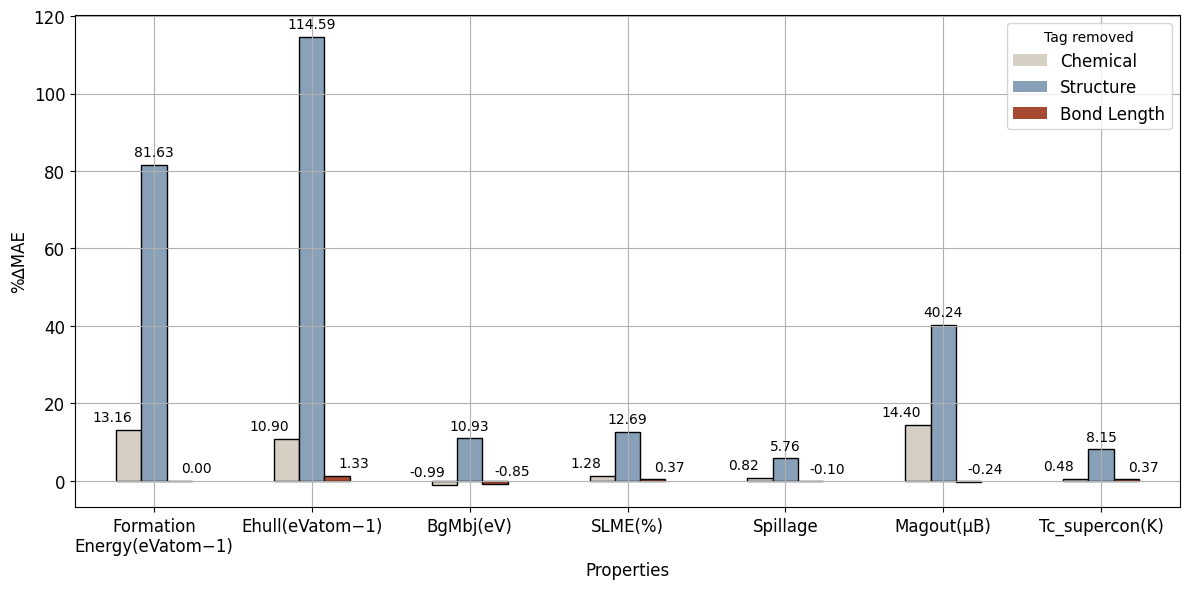

In [35]:

# colors = [ '#EEE3AB',  '#D9CFC1', '#80A1C1', '#BA3F1D', '#A77E58']

colors = [  '#D9CFC1', '#80A1C1', '#BA3F1D', '#A77E58','#EEE3AB']

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
# Convert values to percentages
df_percentage = df_error * 100

# Reset index to convert index to a column
df_percentage = df_percentage.reset_index()

# Melt the DataFrame to long format
df_melted = df_percentage.melt(id_vars='index', var_name='Metric', value_name='Value')


# Plot using Seaborn
plt.figure(figsize=(12, 6))
# sns.set(font_scale=1.5)
sns.reset_orig()
ax = sns.barplot(x='index', y='Value', hue='Metric', data=df_melted, palette=colors)

# Customize the plot
plt.xlabel('Properties', fontsize=12)
plt.ylabel('%∆MAE', fontsize=12)
# plt.title('Grouped Bar Plot of Properties in Percentage')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Tag removed', loc='upper right', fontsize=12)
# Remove the default spines
# sns.despine()
# Add annotations
for i, p in enumerate(ax.patches[:21]):
    p.set_edgecolor('black')
    p.set_linewidth(1)
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points')
                
# for container in ax.containers:
#     for bar in container:
#         bar.set_width(0.18)  # Set the bar width

for i, patch in enumerate(ax.patches):
    # print(patch.get_width())
    # print(patch.get_height())
    new_value = 0.16
    current_width = patch.get_width()
    diff = current_width - new_value

    # we change the bar width
    patch.set_width(new_value)
    
    # we recenter the bar
    if i < 7:
        patch.set_x(patch.get_x() + diff)
    if i >= 14:
        patch.set_x(patch.get_x() - 0.5 * diff)
    else:
        patch.set_x(patch.get_x() + diff * .5)


plt.grid(True)
# Add the desired spines
plt.gca().spines['top'].set_visible(True)  # Show top spine
plt.gca().spines['right'].set_visible(True)  # Show right spine
plt.tight_layout()
plt.savefig("chemnlp_bar.png", dpi=600, bbox_inches='tight')
plt.show()